## Data Set Description :

### There are 13 variables in this data set:

#### **.** Loan_ID :	Unique Loan ID
#### **.** Gender :	Male/ Female
#### **.** Married	: Applicant married (Y/N)
#### **.** Dependents :	Number of dependents
#### **.** Education :	Applicant Education (Graduate/ Not Graduate)
#### **.** Self_Employed :	Self employed (Y/N)
#### **.** ApplicantIncome	: Applicant income
#### **.** CoapplicantIncome :	Coapplicant income
#### **.** LoanAmount	: Loan amount in thousands
#### **.** Loan_Amount_Term	: Term of loan in months
#### **.** Credit_History :	credit history
#### **.** Property_Area	: Urban/ Semi Urban/ Rural
#### **.** Loan_Status :	Loan approved (Y/N)


### Data Set Problem :

#### A company wants to automate the loan eligibility process in real-time based on applicants' details provided while filling out the online application form. These details include Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and various other factors. The task is to identify whether applicants are eligible for a loan based on their data, and for this purpose, a machine learning model will be employed .

## 1. Import important Library 📚

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score , recall_score , f1_score , precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Data Set 👓

In [ ]:
df = pd.read_csv('loan.csv',na_values={'?',' '})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 614 entries, 0 to 613

Data columns (total 13 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Loan_ID            614 non-null    object 

 1   Gender             601 non-null    object 

 2   Married            611 non-null    object 

 3   Dependents         599 non-null    object 

 4   Education          614 non-null    object 

 5   Self_Employed      582 non-null    object 

 6   ApplicantIncome    614 non-null    int64  

 7   CoapplicantIncome  614 non-null    float64

 8   LoanAmount         592 non-null    float64

 9   Loan_Amount_Term   600 non-null    float64

 10  Credit_History     564 non-null    float64

 11  Property_Area      614 non-null    object 

 12  Loan_Status        614 non-null    object 

dtypes: float64(4), int64(1), object(8)

memory usage: 62.5+ KB


In [ ]:
data = df.copy()

In [ ]:
df.shape

(614, 13)

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df=df.drop('Loan_ID',axis=1)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.duplicated().sum()

0

## 3. Data Set Exploration and Visualization

### Gender Variable

Gender

Male      489

Female    112

Name: count, dtype: int64


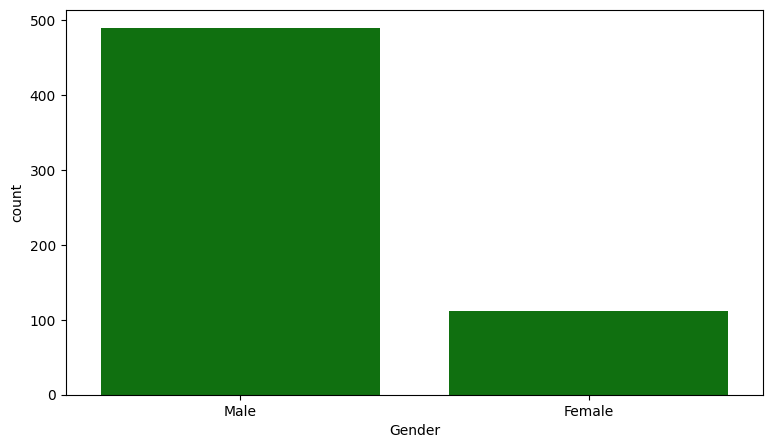

In [ ]:
print(df.Gender.value_counts())

plt.figure(figsize=(9,5))
sns.countplot(x = df.Gender,color = 'g')
plt.show()

 #### From the plot above , men have applied for loans more than women .

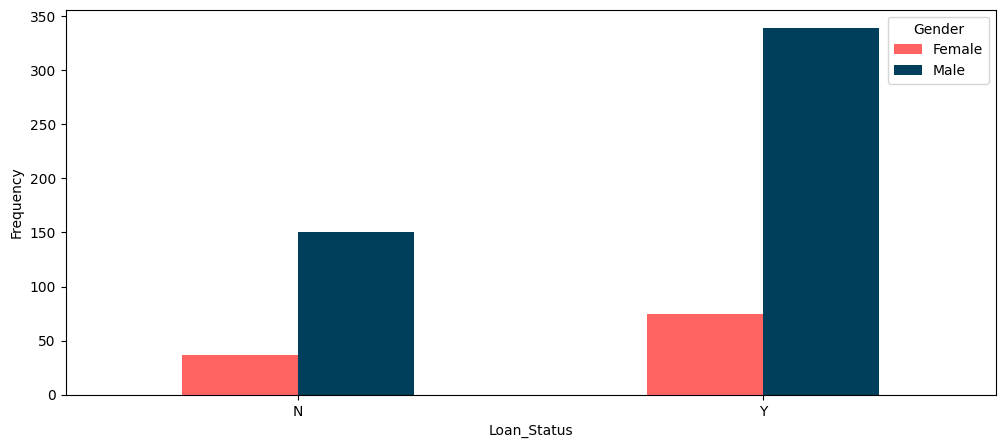

In [ ]:
pd.crosstab(df.Loan_Status,df.Gender).plot(kind="bar",figsize=(12,5),color=['#ff6361','#003f5c'])
plt.xlabel('Loan_Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### Men applied for loans more than women, so more loans were approved for men.

### Marital Status Variable

Married

Yes    398

No     213

Name: count, dtype: int64


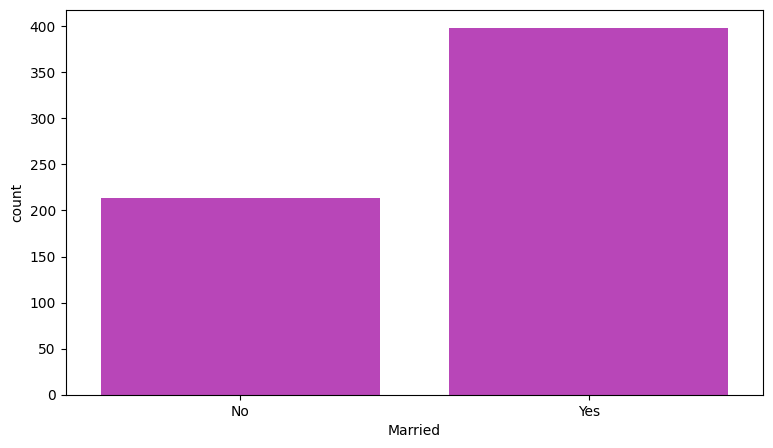

In [ ]:
print(df.Married.value_counts())

plt.figure(figsize=(9,5))
sns.countplot(x = df.Married,color = 'm',alpha = 0.8)
plt.show()

#### Married people have applied for loans more than unmarried .

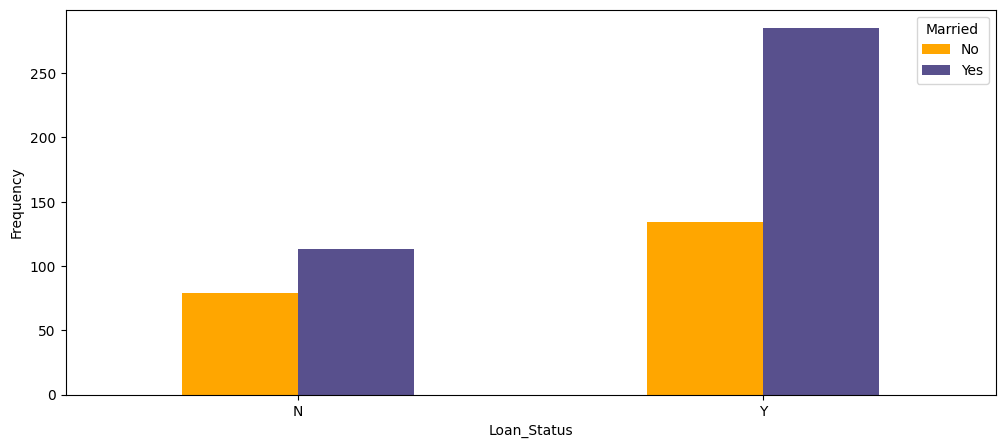

In [ ]:
pd.crosstab(df.Loan_Status,df.Married).plot(kind="bar",figsize=(12,5),color=['#ffa600','#58508d'])
plt.xlabel('Loan_Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### Married people applied for loans more than unmarried, so more loans were approved for Married people.

### Dependents Variable

Dependents

0     345

1     102

2     101

3+     51

Name: count, dtype: int64


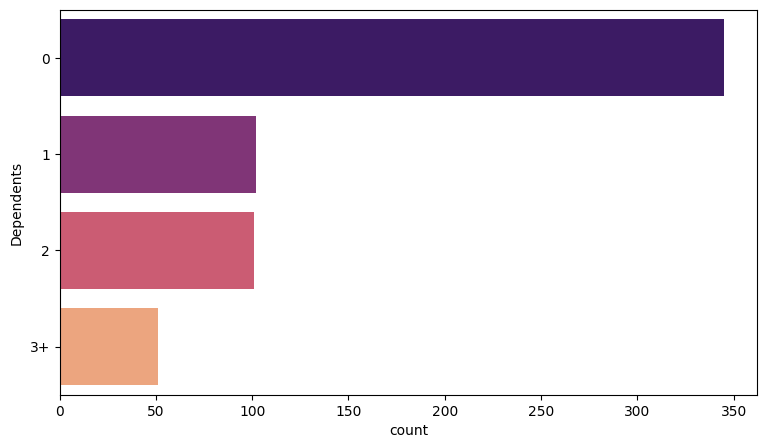

In [ ]:
print(df.Dependents.value_counts())

plt.figure(figsize = (9,5))
sns.countplot(df.Dependents,palette="magma")
plt.show()

#### Most people applied for loans have no Dependents ,therefore ,it is clear that most of the people whose loan applications were approved belong to this group, which we will check in the next plot.

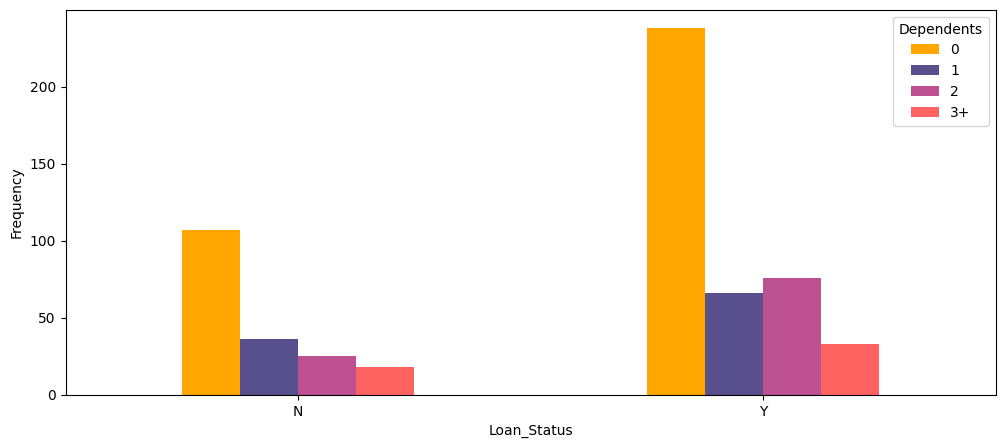

In [ ]:
pd.crosstab(df.Loan_Status,df.Dependents).plot(kind="bar",figsize=(12,5),color=['#ffa600','#58508d','#bc5090','#ff6361'])
plt.xlabel('Loan_Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Education Variable

Education

Graduate        480

Not Graduate    134

Name: count, dtype: int64


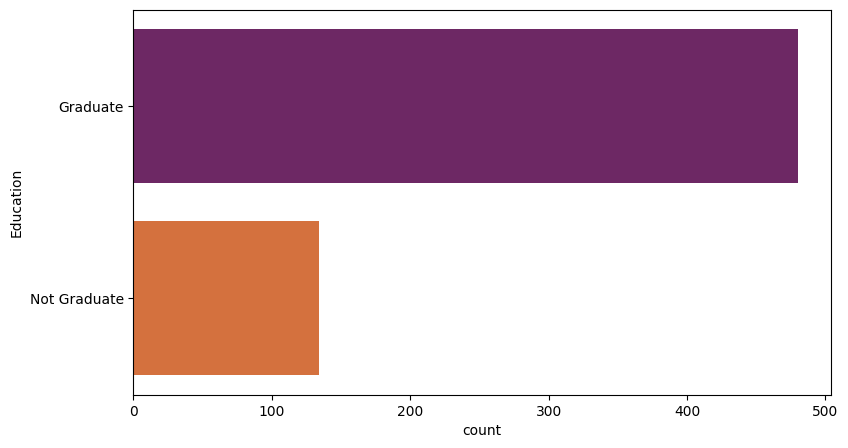

In [ ]:
print(df.Education.value_counts())

plt.figure(figsize = (9,5))
sns.countplot(df.Education,palette="inferno")
plt.show()

#### Graduates applied for loans more often than non-graduates.

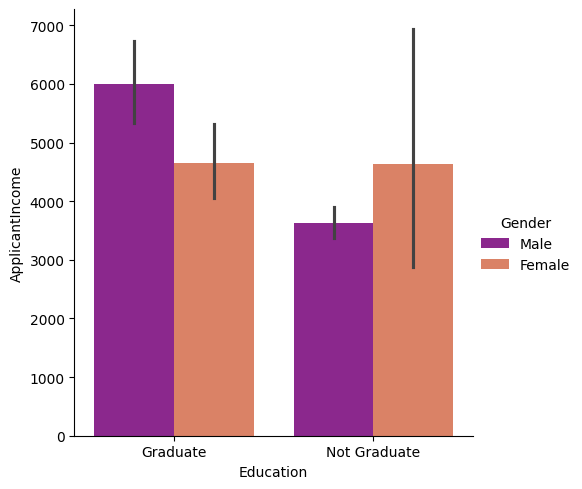

In [ ]:
sns.catplot(x=df.Education,y=df.ApplicantIncome,hue = df.Gender , kind='bar',palette='plasma')
plt.show()

#### Graduates have higher incomes compared to non-graduates, and among graduates, men have higher incomes than women. However, among non-graduates, women have higher incomes than men.

### 	Self_Employed Variable

Self_Employed

No     500

Yes     82

Name: count, dtype: int64


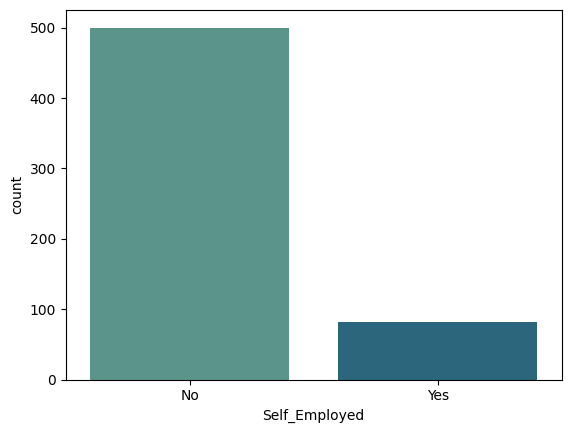

In [ ]:
print(df.Self_Employed.value_counts())

sns.countplot(x=df.Self_Employed,palette="crest")
plt.show()

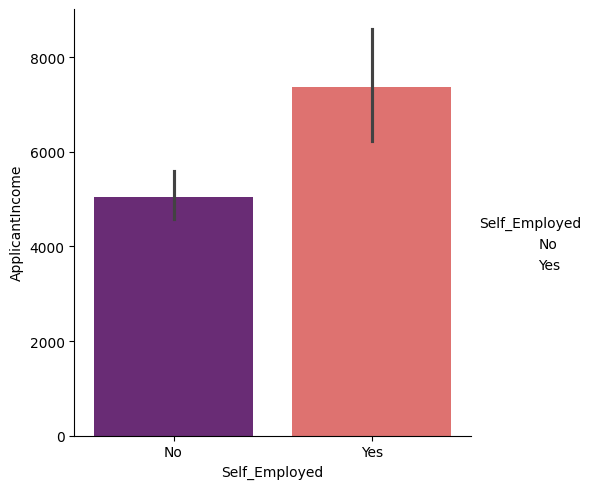

In [ ]:
sns.catplot(x=df.Self_Employed,y=df.ApplicantIncome, kind='bar',palette='magma')
plt.show()

#### The income of self-employed people is higher than people who are not self-employed and we can also see in the next plot .

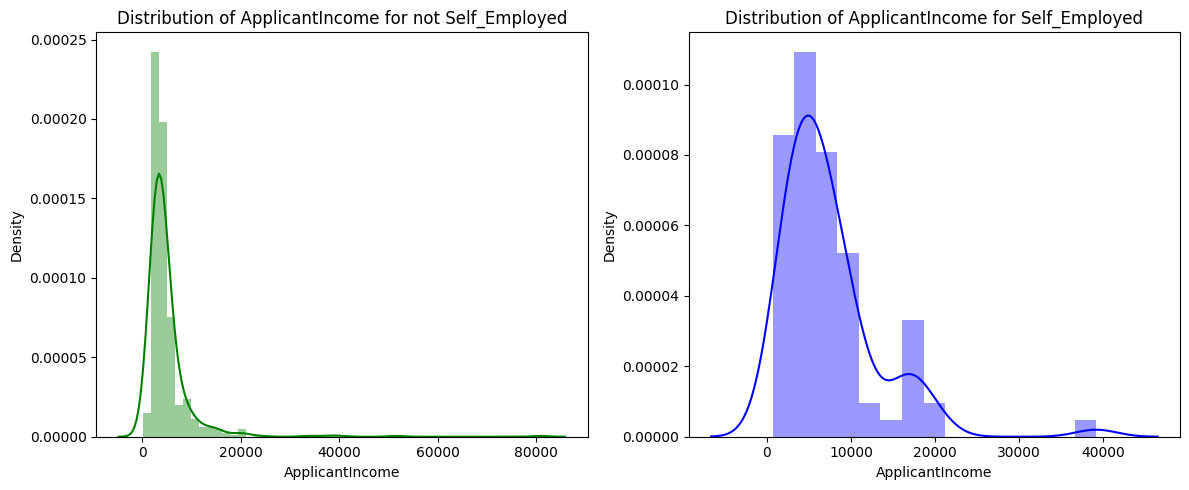

In [ ]:
f=plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df['ApplicantIncome'][df.Self_Employed=='No'],color='g' ,ax=ax )
ax.set_title('Distribution of ApplicantIncome for not Self_Employed')

ax=f.add_subplot(122)
sns.distplot(df['ApplicantIncome'][df.Self_Employed=='Yes'],color='b',ax=ax)
ax.set_title('Distribution of ApplicantIncome for Self_Employed')

plt.tight_layout()
plt.show()


### ApplicantIncome Variable

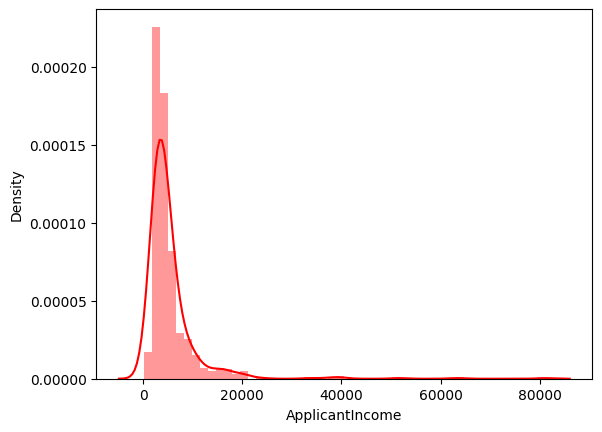

In [ ]:
sns.distplot(df.ApplicantIncome,color='r')
plt.show()

#### The distribution of 'ApplicantIncome' column is moderately skewed

### Credit_History Variable

Credit_History

1.0    475

0.0     89

Name: count, dtype: int64


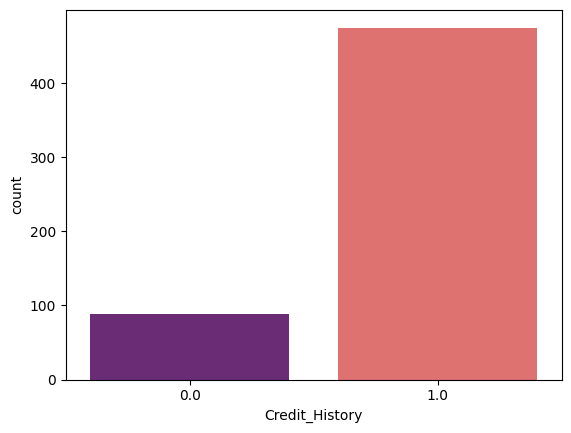

In [ ]:
print(df.Credit_History.value_counts())

sns.countplot(x=df.Credit_History,palette="magma")
plt.show()

#### From the plot above , People who have Credit History are more than people who don't have Credit History

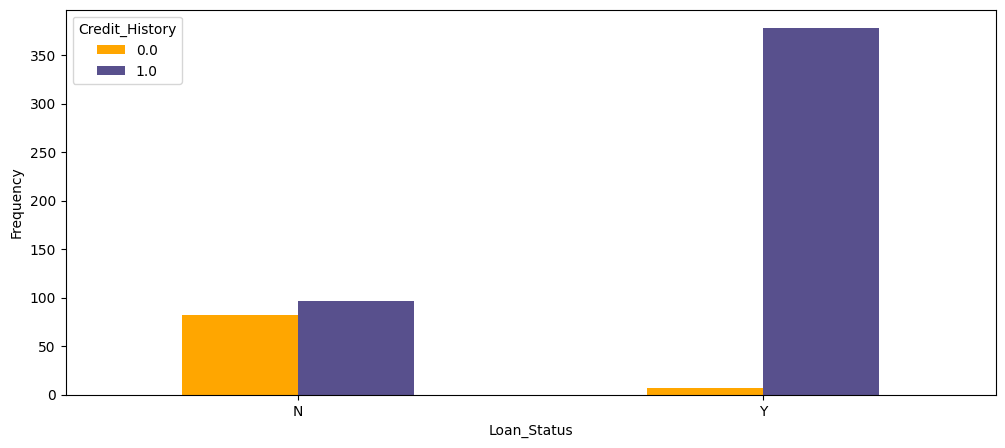

In [ ]:
pd.crosstab(df.Loan_Status,df.Credit_History).plot(kind="bar",figsize=(12,5),color=['#ffa600','#58508d'])
plt.xlabel('Loan_Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### Applicants with a credit history have a better chance of loan approval compared to Applicants without a credit history.

## 4. Data Set Preparation

### Missing values

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df=df.dropna(subset=['Married'])

In [ ]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42,
                                                 shuffle=True)
print(f'x_train shape is : {x_train.shape}')
print(f'x_test shape is : {x_test.shape}')
print(f'y_train shape is : {y_train.shape}')
print(f'y_test shape is : {y_test.shape}')

x_train shape is : (519, 11)

x_test shape is : (92, 11)

y_train shape is : (519,)

y_test shape is : (92,)


In [ ]:
for i in df.columns :
  if df[i].isnull().sum()>0:
    print(i)

Gender

Dependents

Self_Employed

LoanAmount

Loan_Amount_Term

Credit_History


In [ ]:
x_train['Gender'] = x_train['Gender'].fillna(x_train['Gender'].mode()[0],axis=0)
x_test['Gender'] = x_test['Gender'].fillna(x_test['Gender'].mode()[0],axis=0)

In [ ]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
df['Dependents'].mode()[0]

'0'

In [ ]:
x_train['Dependents'] = x_train['Dependents'].fillna(x_train['Dependents'].mode()[0])
x_test['Dependents'] = x_test['Dependents'].fillna(x_test['Dependents'].mode()[0])

In [ ]:
df['Self_Employed'].value_counts()

Self_Employed
No     497
Yes     82
Name: count, dtype: int64

In [ ]:
x_train['Self_Employed'] = x_train['Self_Employed'].fillna(x_train['Self_Employed'].mode()[0])
x_test['Self_Employed'] = x_test['Self_Employed'].fillna(x_test['Self_Employed'].mode()[0])

In [ ]:
print(x_train.isnull().sum())
print('################')
print(x_test.isnull().sum())

Gender                0

Married               0

Dependents            0

Education             0

Self_Employed         0

ApplicantIncome       0

CoapplicantIncome     0

LoanAmount           16

Loan_Amount_Term     13

Credit_History       37

Property_Area         0

dtype: int64

################

Gender                0

Married               0

Dependents            0

Education             0

Self_Employed         0

ApplicantIncome       0

CoapplicantIncome     0

LoanAmount            5

Loan_Amount_Term      1

Credit_History       13

Property_Area         0

dtype: int64


In [ ]:
imputer = KNNImputer(n_neighbors=5)
for i in x_train.columns :
  if x_train[i].isnull().sum()>0:
    x_train[[i]]=imputer.fit_transform(x_train[[i]])
    if x_test[i].isnull().sum()>0:
      x_test[[i]]=imputer.transform(x_test[[i]])


In [ ]:
print(x_train.isnull().sum())
print('################')
print(x_test.isnull().sum())

Gender               0

Married              0

Dependents           0

Education            0

Self_Employed        0

ApplicantIncome      0

CoapplicantIncome    0

LoanAmount           0

Loan_Amount_Term     0

Credit_History       0

Property_Area        0

dtype: int64

################

Gender               0

Married              0

Dependents           0

Education            0

Self_Employed        0

ApplicantIncome      0

CoapplicantIncome    0

LoanAmount           0

Loan_Amount_Term     0

Credit_History       0

Property_Area        0

dtype: int64


### Encode Target

In [ ]:
df['Loan_Status'].value_counts()

Loan_Status
Y    419
N    192
Name: count, dtype: int64

In [ ]:
y_train = y_train.apply(lambda x : 0 if x=='N' else 1)
y_test = y_test.apply(lambda x : 0 if x=='N' else 1)

In [ ]:
y_train

485    1
369    0
182    1
146    1
503    0
      ..
71     1
107    0
272    1
438    0
102    1
Name: Loan_Status, Length: 519, dtype: int64

### Balance Data

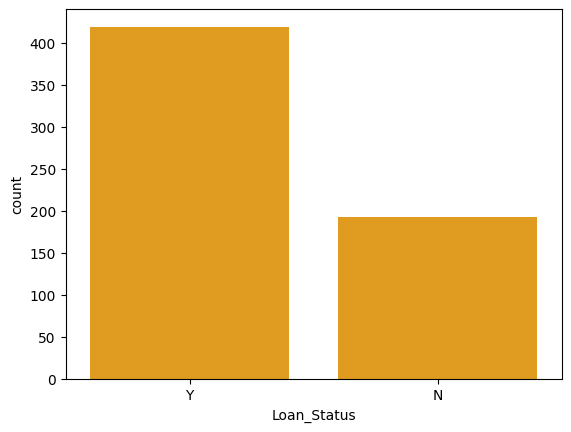

In [ ]:
sns.countplot(x=df['Loan_Status'],color='orange')
plt.show()

In [ ]:
sm = SMOTE()

In [ ]:
cat_x = x.select_dtypes(include=['category','object']).columns
num_x = x.select_dtypes(include=['float','int']).columns
print(cat_x)
print(num_x)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',

       'Property_Area'],

      dtype='object')

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',

       'Loan_Amount_Term', 'Credit_History'],

      dtype='object')


In [ ]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
ct = ColumnTransformer(transformers=[('encode',encoder,cat_x),('scale',scaler,num_x)],
                       remainder='passthrough',sparse_threshold=0)

## 5. Model

### Classification Function for Machine Learning Models

In [ ]:
def fitandeval (model , par , X_train=x_train , X_test=x_test , y_train=y_train , y_test=y_test):
  clf= Pipeline(
    steps=[("columnstransformer", ct),('smote' , sm),('model', model )])
  grid = GridSearchCV(clf, par)
  grid.fit(X_train , y_train)
  best_model=grid.best_estimator_
  print(f'optimized hyperparameters are {grid.best_params_}')
  y_pred_train=best_model.predict(X_train)

  y_pred=best_model.predict(X_test)

  acc_train=accuracy_score(y_train, y_pred_train)
  precision_train=precision_score(y_train, y_pred_train)
  recall_train=recall_score(y_train, y_pred_train)
  f1_train=f1_score(y_train, y_pred_train)


  acc_test=accuracy_score(y_test, y_pred)
  precision_test=precision_score(y_test, y_pred)
  recall_test=recall_score(y_test, y_pred)
  f1_test=f1_score(y_test, y_pred)
  print()
  print('######################')
  print(f'acc in train is {acc_train} and acc in test is {acc_test}')
  print(f'precision in train is {precision_train} and precision in test is {precision_test}')
  print(f'recall in train is {recall_train} and recall in test is {recall_test}')
  print(f'f1 in train is {f1_train} and f1 in test is {f1_test}')
  print()
  print('#######################')


  cf=confusion_matrix(y_test , y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

  return acc_test , recall_test , precision_test , f1_test , best_model


### Logistic Regression

In [ ]:
lr = LogisticRegression()
param_lr ={}

optimized hyperparameters are {}



######################

acc in train is 0.7707129094412332 and acc in test is 0.7717391304347826

precision in train is 0.8047493403693932 and precision in test is 0.875

recall in train is 0.8714285714285714 and recall in test is 0.8115942028985508

f1 in train is 0.8367626886145404 and f1 in test is 0.8421052631578948



#######################


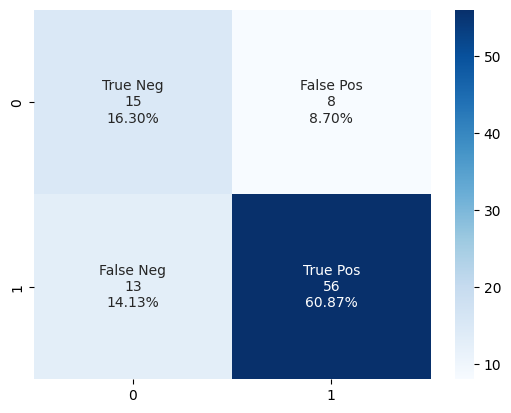

In [ ]:
acc_test_lr , recall_test_lr , precision_test_lr , f1_test_lr , best_model_lr = fitandeval(lr,param_lr)

In [ ]:
best_model_lr

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('smote', SMOTE()), ('model', LogisticRegression())])

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

param_dt = {'model__criterion':["gini", "entropy"],
           'model__max_depth':[5,10,15,20,25],
            'model__min_samples_split':[2,3,5],
            'model__min_samples_leaf':[1,2]}

optimized hyperparameters are {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3}



######################

acc in train is 0.8131021194605009 and acc in test is 0.8260869565217391

precision in train is 0.7868480725623582 and precision in test is 0.8271604938271605

recall in train is 0.9914285714285714 and recall in test is 0.9710144927536232

f1 in train is 0.8773704171934261 and f1 in test is 0.8933333333333333



#######################


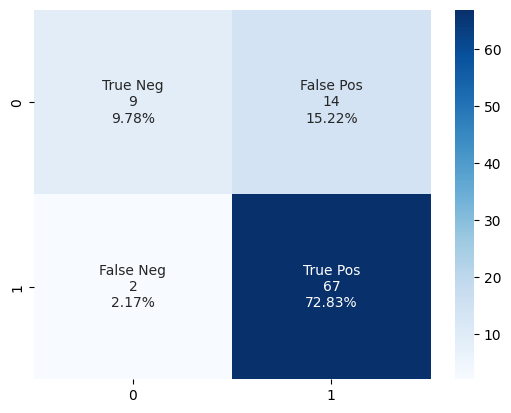

In [ ]:
acc_test_dt , recall_test_dt , precision_test_dt , f1_test_dt , best_model_dt = fitandeval(dt,param_dt)

save the model


In [ ]:
best_model_dt

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,
                                        min_samples_split=3))])

### Random Forest

In [ ]:
rf = RandomForestClassifier()

param_rf = {'model__n_estimators':[20,40,50,60],
            'model__criterion':["gini", "entropy"],
           'model__max_depth':[5,10,15,20,25],
            'model__min_samples_split':[2,3,5],
            'model__min_samples_leaf':[1,2]}

optimized hyperparameters are {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 20}



######################

acc in train is 0.8362235067437379 and acc in test is 0.8260869565217391

precision in train is 0.8287841191066998 and precision in test is 0.8441558441558441

recall in train is 0.9542857142857143 and recall in test is 0.9420289855072463

f1 in train is 0.8871181938911022 and f1 in test is 0.8904109589041096



#######################


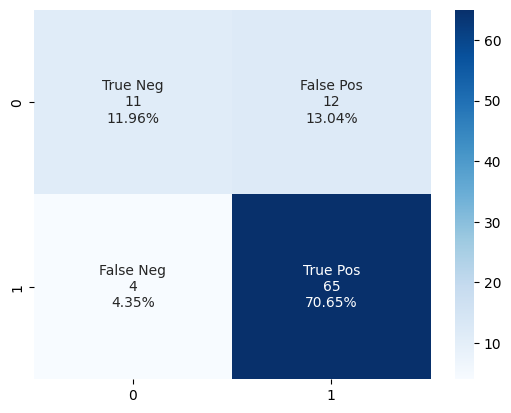

In [ ]:
acc_test_rf , recall_test_rf , precision_test_rf , f1_test_rf , best_model_rf = fitandeval(rf,param_rf)

In [ ]:
best_model_rf

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=2, n_estimators=20))])

### KNN

In [ ]:
knn = KNeighborsClassifier()

param_knn = {'model__n_neighbors':[7,9],
             'model__weights':['uniform', 'distance'],'model__p':[1,2]}

optimized hyperparameters are {'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'uniform'}



######################

acc in train is 0.8073217726396917 and acc in test is 0.8043478260869565

precision in train is 0.8378378378378378 and precision in test is 0.8591549295774648

recall in train is 0.8857142857142857 and recall in test is 0.8840579710144928

f1 in train is 0.8611111111111112 and f1 in test is 0.8714285714285713



#######################


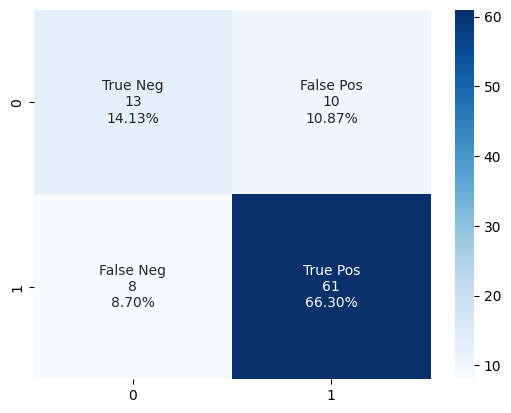

In [ ]:
acc_test_knn , recall_test_knn , precision_test_knn , f1_test_knn , best_model_knn = fitandeval(knn,param_knn)

### comparison models

In [ ]:
dic={"Accuracy":[("{:.5f}".format(acc_test_lr)),("{:.5f}".format(acc_test_dt)),("{:.5f}".format(acc_test_rf)), ("{:.5f}".format(acc_test_knn))],

      "Precision":[("{:.5f}".format(precision_test_lr)),("{:.5f}".format(precision_test_dt)),("{:.5f}".format(precision_test_rf,)), ("{:.5f}".format(precision_test_knn)),
             ],

      "Recall":[("{:.5f}".format(recall_test_lr)),("{:.5f}".format(recall_test_dt)),("{:.5f}".format(recall_test_rf)), ("{:.5f}".format(recall_test_knn)),
             ],


      "f1_Score":[("{:.5f}".format(f1_test_lr)),("{:.5f}".format(f1_test_dt)),("{:.5f}".format(f1_test_rf)), ("{:.5f}".format(f1_test_knn)),
             ]}



main_data=pd.DataFrame.from_dict( dic , orient='index')
main_data.columns=['Logistic Regression','Decision Tree','Random Forest',
                    'KNN']
main_data = main_data.T
main_data

,Accuracy,Precision,Recall,f1_Score
Logistic Regression,0.77174,0.87500,0.81159,0.84211
Decision Tree,0.82609,0.82716,0.97101,0.89333
Random Forest,0.82609,0.84416,0.94203,0.89041
KNN,0.80435,0.85915,0.88406,0.87143


In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>

Index: 4 entries, Logistic Regression to KNN

Data columns (total 4 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   Accuracy   4 non-null      object

 1   Precision  4 non-null      object

 2   Recall     4 non-null      object

 3   f1_Score   4 non-null      object

dtypes: object(4)

memory usage: 160.0+ bytes


In [ ]:
for i in main_data.columns :
  main_data[i]=main_data[i].astype(float)

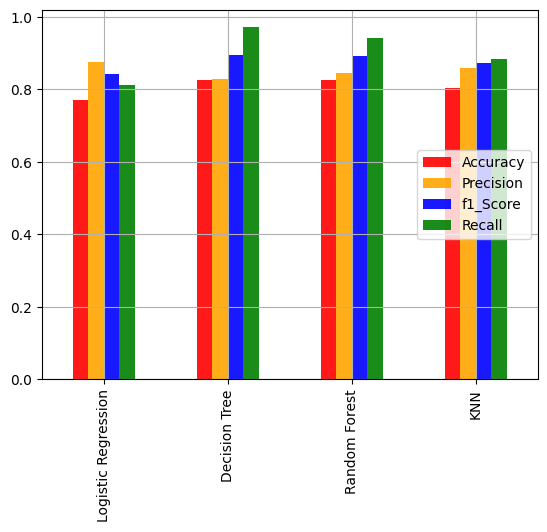

In [ ]:
ax=main_data.plot(kind='bar',y=['Accuracy','Precision','f1_Score','Recall',],color=['red','orange','blue','green'],alpha=0.9)
plt.legend(loc='right')
plt.grid()
plt.show()

### Ensemble Methods

### Bagging

optimized hyperparameters are {'model__n_estimators': 160}



######################

acc in train is 0.8304431599229287 and acc in test is 0.8478260869565217

precision in train is 0.8149038461538461 and precision in test is 0.8571428571428571

recall in train is 0.9685714285714285 and recall in test is 0.9565217391304348

f1 in train is 0.8851174934725848 and f1 in test is 0.904109589041096



#######################


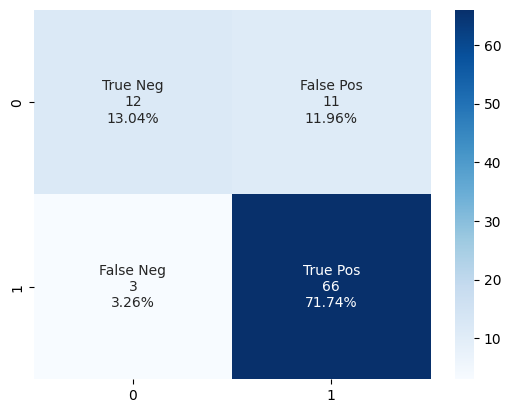

In [ ]:
#optimized hyperparameters are {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3}
base=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2,
                            min_samples_split=3)

Bag=BaggingClassifier(estimator=base, n_estimators=20)

param_bag=dict(model__n_estimators=np.arange(10,200,30))


acc_BAG, recall_BAG , precision_BAG, f1_BAG, best_BAG=fitandeval(Bag,param_bag)

In [ ]:
 best_BAG

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('model',
                 BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                    min_samples_leaf=2,
                                                                    min_samples_split=3),
                                   n_estimators=160))])

### Boosting

In [ ]:
base_ada=base=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2,
                            min_samples_split=3)

ADA = AdaBoostClassifier(estimator = base_ada)

param_ADA = {"model__n_estimators": [3,4,7,9]}

optimized hyperparameters are {'model__n_estimators': 3}



######################

acc in train is 0.8766859344894027 and acc in test is 0.8478260869565217

precision in train is 0.8763157894736842 and precision in test is 0.8873239436619719

recall in train is 0.9514285714285714 and recall in test is 0.9130434782608695

f1 in train is 0.9123287671232876 and f1 in test is 0.9



#######################


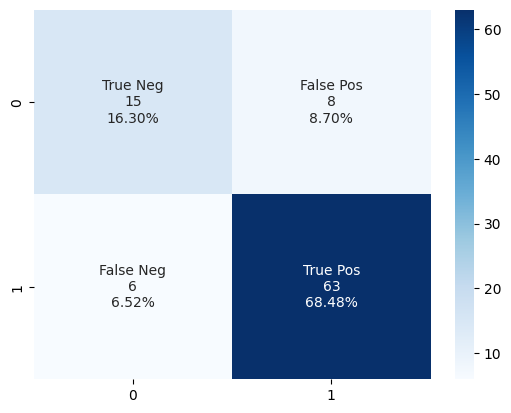

In [ ]:
acc_ada, recall_ada , precision_ada, f1_ada, best_ada=fitandeval(ADA,param_ADA)

In [ ]:
best_ada

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                     min_samples_leaf=2,
                                                                     min_samples_split=3),
                                    n_estimators=3))])

### Voting and Stacking

In [ ]:
def fitandeval_VS (model  , X_train=x_train , X_test=x_test , y_train=y_train , y_test=y_test):

  model.fit(X_train , y_train)
  best_model=model

  y_pred_train=best_model.predict(X_train)

  y_pred=best_model.predict(X_test)

  acc_train=accuracy_score(y_train, y_pred_train)
  precision_train=precision_score(y_train, y_pred_train)
  recall_train=recall_score(y_train, y_pred_train)
  f1_train=f1_score(y_train, y_pred_train)


  acc_test=accuracy_score(y_test, y_pred)
  precision_test=precision_score(y_test, y_pred)
  recall_test=recall_score(y_test, y_pred)
  f1_test=f1_score(y_test, y_pred)
  print()
  print('######################')
  print(f'acc in train is {acc_train} and acc in test is {acc_test}')
  print(f'precision in train is {precision_train} and precision in test is {precision_test}')
  print(f'recall in train is {recall_train} and recall in test is {recall_test}')
  print(f'f1 in train is {f1_train} and f1 in test is {f1_test}')
  print()
  print('#######################')


  cf=confusion_matrix(y_test , y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

  return acc_test , recall_test , precision_test , f1_test , best_model

### Voting

In [ ]:
estimators = [('DT',best_model_dt),
              ('KNN',best_model_knn),
              ('BAG',best_BAG),
              ('ADA Boost',best_ada)]

vot = VotingClassifier(estimators=estimators)
vot

VotingClassifier(estimators=[('DT',
                              Pipeline(steps=[('columnstransformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 sparse_threshold=0,
                                                                 transformers=[('encode',
                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                                               ('scale',
                                                                                StandardScaler(),
                                                                                Index(['ApplicantIncome', '...
                                                                                Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                                               ('scale',
                                                                                StandardScaler(),
                                                                                Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                                              ('smote', SMOTE()),
                                              ('model',
                                               AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                                   min_samples_leaf=2,
                                                                                                   min_samples_split=3),
                                                                  n_estimators=3))]))])



######################

acc in train is 0.8709055876685935 and acc in test is 0.8260869565217391

precision in train is 0.8773333333333333 and precision in test is 0.863013698630137

recall in train is 0.94 and recall in test is 0.9130434782608695

f1 in train is 0.9075862068965517 and f1 in test is 0.8873239436619719



#######################


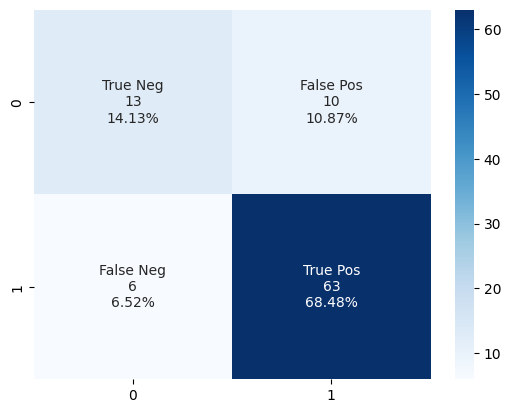

In [ ]:
acc_vot, recall_vot, precision_vot , f1_vot, best_vot=fitandeval_VS(vot)

### Stacking

In [ ]:
level0 = [('DT',best_model_dt),
              ('KNN',best_model_knn),
              ('BAG',best_BAG),
              ('ADA Boost',best_ada)]

level1 = LogisticRegression()

st= StackingClassifier(estimators=level0, final_estimator=level1)
st

StackingClassifier(estimators=[('DT',
                                Pipeline(steps=[('columnstransformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   sparse_threshold=0,
                                                                   transformers=[('encode',
                                                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                                                 ('scale',
                                                                                  StandardScaler(),
                                                                                  Index(['ApplicantIncome'...
       'Property_Area'],
      dtype='object')),
                                                                                 ('scale',
                                                                                  StandardScaler(),
                                                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                                                ('smote', SMOTE()),
                                                ('model',
                                                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                                     min_samples_leaf=2,
                                                                                                     min_samples_split=3),
                                                                    n_estimators=3))]))],
                   final_estimator=LogisticRegression())



######################

acc in train is 0.8285163776493256 and acc in test is 0.8152173913043478

precision in train is 0.8 and precision in test is 0.8170731707317073

recall in train is 0.9942857142857143 and recall in test is 0.9710144927536232

f1 in train is 0.886624203821656 and f1 in test is 0.8874172185430462



#######################


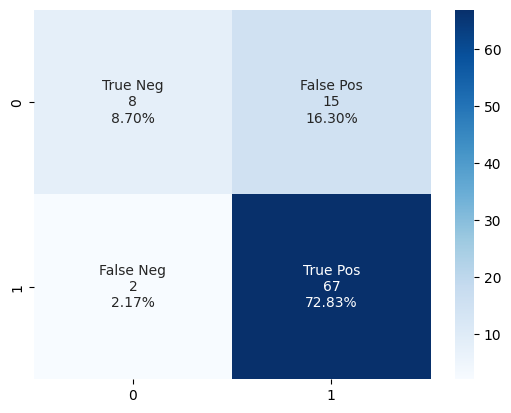

In [ ]:
acc_st, recall_st, precision_st , f1_st, best_st=fitandeval_VS(st)

## 6. Compare the results of Models

In [ ]:
dic1={"Accuracy":[("{:.5f}".format(acc_test_lr)),("{:.5f}".format(acc_test_dt)),("{:.5f}".format(acc_test_rf)), ("{:.5f}".format(acc_test_knn)),
             ("{:.5f}".format(acc_BAG)),("{:.5f}".format(acc_ada,)),("{:.5f}".format(acc_vot,)),("{:.5f}".format(acc_st,))],

      "Precision":[("{:.5f}".format(precision_test_lr)),("{:.5f}".format(precision_test_dt)),("{:.5f}".format(precision_test_rf)), ("{:.5f}".format(precision_test_knn)),
             ("{:.5f}".format(precision_BAG)),("{:.5f}".format(precision_ada)),("{:.5f}".format(precision_vot)),("{:.5f}".format(precision_st))],

      "Recall":[("{:.5f}".format(recall_test_lr)),("{:.5f}".format(recall_test_dt)),("{:.5f}".format(recall_test_rf)), ("{:.5f}".format(recall_test_knn)),
             ("{:.5f}".format(recall_BAG)),("{:.5f}".format(recall_ada)),("{:.5f}".format(recall_vot)),("{:.5f}".format(recall_st))],


      "f1_Score":[("{:.5f}".format(f1_test_lr)),("{:.5f}".format(f1_test_dt)),("{:.5f}".format(f1_test_rf)), ("{:.5f}".format(f1_test_knn)),
             ("{:.5f}".format(f1_BAG)),("{:.5f}".format(f1_ada)),("{:.5f}".format(f1_vot)),("{:.5f}".format(f1_st))]}



main_data1=pd.DataFrame.from_dict( dic1 , orient='index')
main_data1.columns=['Logistic Regression','Decision Tree','Random Forest',
                    'KNN','Bagging','Boosting','Voting','Stacking ']
main_data1 = main_data1.T
main_data1

,Accuracy,Precision,Recall,f1_Score
Logistic Regression,0.77174,0.87500,0.81159,0.84211
Decision Tree,0.82609,0.82716,0.97101,0.89333
Random Forest,0.82609,0.84416,0.94203,0.89041
KNN,0.80435,0.85915,0.88406,0.87143
Bagging,0.84783,0.85714,0.95652,0.90411
Boosting,0.84783,0.88732,0.91304,0.90000
Voting,0.82609,0.86301,0.91304,0.88732
Stacking,0.81522,0.81707,0.97101,0.88742


In [ ]:
for i in main_data1.columns :
  main_data1[i]=main_data1[i].astype(float)

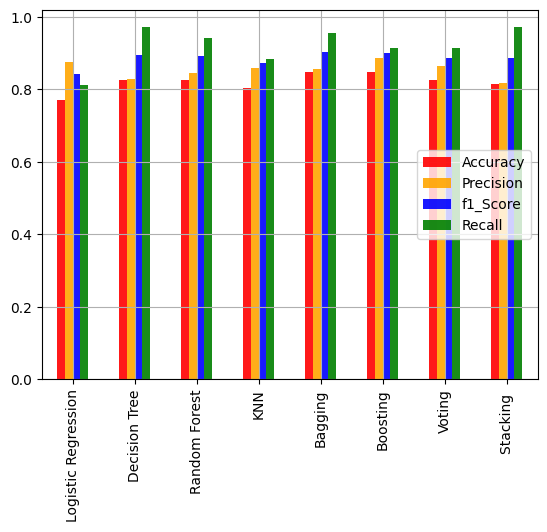

In [ ]:
ax=main_data1.plot(kind='bar',y=['Accuracy','Precision','f1_Score','Recall',],color=['red','orange','blue','green'],alpha=0.9)
plt.legend(loc='right')
plt.grid()
plt.show()

#### Bagging (with hyperparameter tuning) have good scores.